# D213 - Advanced Data Analytics Performance Assessment Task 2

Assignment Completed by Favio Conde and Submitted August 23, 2023 for WGU - MSDA
</br>

### Table of Contents

#### Part I: Research Question
<ul>
    <li><a href='#a1'>A1: Research Question</a></li>
    <li><a href='#a2'>A2: Objectives or Goals</a></li>
    <li><a href='#a3'>A3: Prescribed Network</a></li>
</ul>
 
#### Part II: Data Preparation
<ul>
    <li><a href='#b1'>B1. Data Exploration</a></li>
    <li><a href='#b2'>B2. Tokenization</a></li>
    <li><a href='#b3'>B3. Padding Process</a></li>
    <li><a href='#b4'>B4. Categories of Sentiment</a></li>
    <li><a href='#b5'>B5. Steps to Prepare the Data</a></li>
    <li><a href='#b6'>B6. Prepared Data Set</a></li>
</ul> 

#### Part III: Network Architecture
<ul>
    <li><a href='#c1'>C1: Model Summary</a></li>
    <li><a href='#c2'>C2: Network Architecture</a></li>
    <li><a href='#c3'>C3: Hyperparameters</a></li>
</ul>

#### Part IV: Model Evaluation
<ul>
    <li><a href='#d1'>D1: Stopping Criteria</a></li>
    <li><a href='#d2'>D2: Fitness</a></li>
    <li><a href='#d3'>D3: Training Process</a></li>
    <li><a href='#d4'>D4: Predictive Accuracy</a></li>
</ul>

#### Part V: Summary and Recommendations
<ul>
    <li><a href='#e'>E: Code</a></li>
    <li><a href='#f'>F. Functionality</a></li>
    <li><a href='#g'>G. Recommendations</a></li>
</ul>

#### Part VI: Reporting
<ul>
    <li><a href='#h'>F: Reporting</a></li>
    <li><a href='#i'>G. Third-Party Code Reference</a></li>
    <li><a href='#j'>H. Sources</a></li>
</ul>

### PART I: RESEARCH QUESTION

#### A1. Research Question<a id='a1'></a>

Can sentiment analysis be performed on the data sets to determine the public's sentiment in the feedback provided so the companies can take the proper steps to address concerns?

#### A2. Objectives or Goals<a id='a2'></a>

The analysis aims to determine whether customer sentiment can be predicted based on the words used in the feedback provided.

#### A3. Prescribed Network<a id='a3'></a>

According to Amazon, deep learning neural networks "have several hidden layers with millions of artificial neurons linked together."  Deep learning neural networks (DNN) work like a brain and do not rely on a data scientist to manually set the critical features. In contrast, for DNN, a data scientist provides the raw data, and the model sets the feature importance and learns independently from human interaction.  DNN works best in sequential data, where one data point is dependent on another point (Dr. Elleh, n.d., Slide 17).

### PART II: DATA PREPARATION

#### B1. Data Exploration<a id='b1'></a>

There were emojis present in the data.  For example, Amazon's review data on index line 387 has a ":)".  To clean the data, I converted all text to lowercase.  The model is case-sensitive, so it would interpret "Go" and "go" as two distinct words.  I made all review text lowercase to cut down on the vocabulary size.  Additionally, I used stop words to remove words that don't alter the significance of the sentence and reduce the vocabulary size of the data.

The vocabulary size is the number of distinct words in the data set, which includes Amazon, IMDB, and Yelp.  Cleaning up the data, as described in the last paragraph, aids in reducing the number of words in the data set to improve the sentiment analysis model.

For deep learning to work in the sentiment analysis model, I needed to vectorize each sentence.  To accomplish this, I used word embedding length, which assigns each word a number relative to the position of that word from the beginning of the list; the list includes all vocabulary words (vocabulary size).  This process works by integer encoding each word in the data.  I also set a maximum sequence length.  I set the maximum sequence length to preserve more words surrounding the target word so the model can make better predictions.

#### B2. Tokenization<a id='b2'></a>

In order to prepare to tokenize the reviews, I did the following:

<ul>
    <li>Converted all text in reviews to lowercase</li>
    <li>Removed all stop words</li>
    <li>Lemmatized each word to it's base form</li>
</ul>

The purpose of tokenization is to remove any abnormal characters or formatting, and to standardize the text across each column in the data set (Dr. Elleh, n.d., Slide 27).

#### B3. Padding Process<a id='b3'></a>

I used padding to standardize the length of the sequences.  The padding process ensures that each sentence passed through the model has the same number of words, normalizing the data set.  To pad the review sentences, I used the max length for the number of words in a sentence, which was 44.

A screenshot of a single padded sequence can be found in the code, in section <a href='#e'>E</a>.

#### B4. Categories of Sentiment<a id='b4'></a>

The reviews in each data set, `Amazon`, `IMDB`, and `Yelp`, were classified as 0 for negative and 1 for positive reviews. As a result, there will be two categories of sentiment.

#### B5. Steps to Prepare the Data<a id='b5'></a>

To prepare the data, I started by importing all of the libraries and packages I would need to perform my sentiment analysis of the data.  I also imported the following text files:

<ul>
    <li>amazon_cells_labelled.txt</li>
    <li>imdb_labelled.txt</li>
    <li>yelp_labelled.txt</li>
</ul>

There were quotation marks that did not have a pair, so that caused only 748 rows to import in the IMDB data set, so I imported `CSV` and set `quoting=csv.QUOTE_NONE`, which resolved the issue.  I used `pd.concat()` to combine all three data sets into one data frame and called it `df`, and set the label column data type, which lists `0`/`1` for `negative`/`positive` reviews, to an integer.

I used `regex` and a `lambda` function to remove all punctuations from the text.  To simplify the analysis, I reduced the number of words by removing stop words, which are words that don't alter the significance of the sentence.  To further reduce the vocabulary size, I used `nltk.WordNetLemmatizer()`, which reduces words to it's base.  For example, the function reduced `tied` to its base `tie`.  Applying a lemmatizer to the vocabulary reduced the number of distinct words in the list.  Instead of counting `playing` and `play` as two words, the process changes `playing` to `play`, and classifies both words as `play`.

Next, I tokenized the reviews by using `word_tokenize`, which converts each sentence into a list, and each word is an item.  At this point, I counted the number of words in each row and dropped any rows where the number of words was less than 4.  This reduces the 3,000 rows down to 2,065 rows.

To check the vocabulary size, I used `Tokenizer()` and fit it to the `review` column in the data frame.  The result was that the vocabulary list was 4,132 words.

The next step involved `max_sequence_embedding`, which takes the square root of the vocabulary list twice.  After rounding, the result was 8.  I also calculated the max, mean, and min for the number of words in a sentence, and the results were 44, 8, and 4, respectively.

I used padding to standardize the length of the sequences. The padding process ensures that each sentence passed through the model has the same number of words, normalizing the data set. To pad the review sentences, I used `tokenizer.texts_to_sequences` on the `review` column and applied the `pad_sequence` after setting several hyperparameters.

#### B6. Prepared Data Set<a id='b6'></a>

The following CSV files were submitted in the performance assessment:

<ul>
    <li>cleaned_data.csv</li>
    <li>x_train.csv</li>
    <li>x_test.csv</li>
    <li>x_val.csv</li>
    <li>y_train.csv</li>
    <li>y_test.csv</li>
    <li>y_val.csv</li>
</ul>

### PART III: NETWORK ARCHITECTURE

#### C1. Model Summary<a id='c1'></a>

A screenshot of the model summary output can be found in the code, in section <a href='#e'>E</a>.

#### C2. Network Architecture<a id='c2'></a>

I used `Sequential()` from `tensorflow.keras.models` to build my model, and I used six layers to build my model.  The first layer uses embedding as an input layer and next layer is `GlobalAveragePooling1D`.  The next three layers are hidden layers with nodes 50, 30 and 10, respectively.  The output layer uses one nodes since the model is a binary response.  For the model metrics I used 'accuracy', `binary_crossentropy` for the loss, `adam` for the optimizer, and 20 epochs.

#### C3. Hyperparameters<a id='c3'></a>

I'm using `sigmoid` for the activation function since we're assessing a binary model, and sigmoid works well in binary models.  Our model has two outputs, `1` for positive and a `0` for negative reviews.  

I used 44 nodes for the embedding layer, the maximum length of any given review in the combined data set.  For the hidden layers, I tried several nodes to improve my model's accuracy and stopped once I got close to an accuracy of almost 80% in the `model.evaluate()` function.

I used `binary_crossentropy` for the loss function because the result is binary, and `binary_crossentropy` works well for classification.

I used `adam` optimizer because it is extremely fast.  I used a patience level of 2 for the stopping criteria, meaning that the model will stop if the accuracy stops improving across two epochs.

For the evaluation metric, I used `accuracy` to determine the accuracy of the sentiment analysis model in classifying reviews as positive or negative.

### PART IV: MODEL EVALUATION

#### D1. Stopping Criteria<a id='d1'></a>

In my model, I used the `early_stopping_monitor` fucntion and I set it at a patience of 2.  This helps prevent overfitting of the model by stopping once there is no improvement in accuracy across two epochs.

The code and results can be found in <a href='#e'>E</a>.

#### D2. Fitness<a id='d2'></a>

I used a ' Dropout () ' layer to help with overfitting and improve my model's accuracy.  I saw a slight improvement in the model's accuracy.  I set epochs to 20 and early stopping to 2.  However, the model stopped after 10 epochs since the accuracy did not improve after 10 epochs.

The `Model Accuracy` line graph shows the `Train` line approach 100%, which is great.  The `Validate` line end off around 78% percent which is also good.  For the `Model Loss`, the `Train` line is less than 10%, which again is great.  However, the `Validate` line start increasing after 9 epochs and ends off around 60% which may indicate slight overfitting.

#### D3. Training Process<a id='d3'></a>

Visualizations can be found in section <a href='#e'>E</a> for both the epochs and the line graphs.

#### D4. Predictive Accuracy<a id='d4'></a>

The model accuracy resulted in 78.7%.  I started my model with two hidden layers and did not use a dropoff, and I saw an accuracy score of around 55%.  I added layers and implemented the dropout layer and saw a significant increase in the model.

### PART V: SUMMARY AND RECOMMENDATIONS

#### E. Code<a id='e'></a>

In [1]:
#importing packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow.keras
import nltk
import warnings
import csv
import re
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras import layers
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

In [2]:
#importing each CSV file
amazon = pd.read_csv('Files/sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', 
                     header=None, names=['review', 'label'], quoting=csv.QUOTE_NONE)
imdb = pd.read_csv('Files/sentiment labelled sentences/imdb_labelled.txt', sep='\t', 
                   header=None, names=['review', 'label'], quoting=csv.QUOTE_NONE)
yelp = pd.read_csv('Files/sentiment labelled sentences/yelp_labelled.txt', sep='\t', 
                   header=None, names=['review', 'label'], quoting=csv.QUOTE_NONE)

#combining all data sets
df = pd.concat((amazon, imdb, yelp), ignore_index=True)

#make reviews all lowercase
df['review'] = df['review'].str.lower() 

#converting label column to int
df.label = df.label.astype(int)

#removing punctuation (manjeet_04, 2023)
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', ' ',x))

#setting stop words
stop_words = stopwords.words('english')

for item in range(len(df)):
    sentence = []
    words = df.review.iloc[item].split()
    for word in words:
        if word not in stop_words:
            sentence.append(word)
    df.review.iloc[item] = ' '.join(sentence)
    
#printing df to check updated review column
df.head()

,review,label
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutes ...,0
4,mic great,1


In [3]:
#creating lemma
lemma = nltk.WordNetLemmatizer()

#creating function to lemmatize reviews
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemma.lemmatize(word, 'v') for word in words]
    return ' '.join(lemmatized_words)

#applying function to df
df.review = df.review.apply(lemmatize_text)

#checking df updates
#df

#tokenizing review in each column
df.review = df.review.apply(word_tokenize)

#checking df updates
df.head()

,review,label
0,"[way, plug, us, unless, go, converter]",0
1,"[good, case, excellent, value]",1
2,"[great, jawbone]",1
3,"[tie, charger, conversations, last, 45, minute...",0
4,"[mic, great]",1


In [4]:
#counting words in sentence and adding count to 'word_count' column
word_count = []
for i in range(len(df)):
    word_count.append(len(df['review'][i]))
df['word_count'] = word_count

#dropping any sentences with < 4 words
df = df[df['word_count'] > 3]
df.reset_index(drop=True, inplace=True)
df.drop('word_count', axis=1, inplace=True)
df

,review,label
0,"[way, plug, us, unless, go, converter]",0
1,"[good, case, excellent, value]",1
2,"[tie, charger, conversations, last, 45, minute...",0
3,"[jiggle, plug, get, line, right, get, decent, ...",0
4,"[several, dozen, several, hundred, contact, im...",0
...,...,...
2060,"[lady, table, next, us, find, live, green, cat...",0
2061,"[think, food, flavor, texture, lack]",0
2062,"[overall, impress, would, go, back]",0
2063,"[whole, experience, underwhelming, think, go, ...",0


In [5]:
#checking vocabulary size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.review)
vocab_size = tokenizer.word_index
print(f'The size of the vocabulary in the data set is {len(vocab_size) + 1}.')

The size of the vocabulary in the data set is 4132.


In [6]:
#instantiating word embedding lenth
max_sequence_embedding = int(round(np.sqrt(np.sqrt(len(vocab_size)+1)), 0))
print(f'The max sequence embedding is {max_sequence_embedding}.')

The max sequence embedding is 8.


In [7]:
#instantiating max length
review_length = []

for review in df.review:
    review_length.append(len(review))
    
max_length = int(round(np.max(review_length), 0))
mean_length = int(round(np.mean(review_length), 0))
min_length = int(round(np.min(review_length), 0))
print(f'The max length is {max_length}.')
print(f'The mean length is {mean_length}.')
print(f'The min length is {min_length}.')

The max length is 44.
The mean length is 8.
The min length is 4.


In [8]:
#instantiating padding
vocab_len = len(vocab_size)
oov_tok = '<OOV>'
embedding_dim = max_sequence_embedding
max_length = max_length
trunc_type = 'post'
padding_type = 'post'

sequences = tokenizer.texts_to_sequences(df.review)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#example of single padded sequence
print('Example of text seqence and padded sequence:')
print(df.review[0])
print(padded[0])

Example of text seqence and padded sequence:
['way', 'plug', 'us', 'unless', 'go', 'converter']
[  45  195   98  416   12 1789    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [9]:
#defining x and y, prepping to split data
x = padded
y = df.label.values

#splitting data into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 15)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 15)

#converting arrays into series
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_val = pd.Series(y_val)

#viewing train and test data size
print(f'Total data size is {df.shape[0]}.')
print(f'Training data size is {x_train.shape[0]}.')
print(f'Testing data size is {x_test.shape[0]}.')
print(f'Validating data size is {x_val.shape[0]}.')

Total data size is 2065.
Training data size is 1321.
Testing data size is 413.
Validating data size is 331.


In [10]:
#converting to DataFrame to export to CSV
X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test)
X_val = pd.DataFrame(x_val)
Y_train = pd.DataFrame(y_train)
Y_test = pd.DataFrame(y_test)
Y_val = pd.DataFrame(y_val)

#exporting CSV files
df.to_csv(r'cleaned_data.csv', index=False)
X_train.to_csv(r'x_train.csv', index=False)
X_test.to_csv(r'x_test.csv', index=False)
X_val.to_csv(r'x_val.csv', index=False)
Y_train.to_csv(r'y_train.csv', index=False)
Y_test.to_csv(r'y_test.csv', index=False)
Y_val.to_csv(r'y_val.csv', index=False)

In [11]:
#identifying the number of sentiment categories
activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = "adam"
num_epochs = 20

#defining early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Embedding(vocab_len + 1, embedding_dim, input_length=max_length),
    tensorflow.keras.layers.GlobalAveragePooling1D(),
    tensorflow.keras.layers.Dropout(0.25),
    tensorflow.keras.layers.Dense(100, activation='relu'),
    tensorflow.keras.layers.Dense(60, activation='relu'),
    tensorflow.keras.layers.Dense(10, activation='relu'),
    #tensorflow.keras.layers.Dropout(0.2, input_shape=(44,)),
    tensorflow.keras.layers.Dense(1, activation=activation)
])

#compiling model
model.compile(loss=loss, optimizer=optimizer, metrics = ['accuracy'])

#printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 44, 8)             33056     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 60)                6060      
                                                                 
 dense_2 (Dense)             (None, 10)                610       
                                                        

In [12]:
#fitting model
history = model.fit(x_train, y_train, batch_size=32, epochs=num_epochs, validation_split = 0.3, 
callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/20
29/29 [==============================] - 1s 13ms/step - loss: 0.6939 - accuracy: 0.5032 - val_loss: 0.6923 - val_accuracy: 0.5264
Epoch 2/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5032 - val_loss: 0.6926 - val_accuracy: 0.5264
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5032 - val_loss: 0.6921 - val_accuracy: 0.5264
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5032 - val_loss: 0.6905 - val_accuracy: 0.5264
Epoch 5/20
29/29 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5617 - val_loss: 0.6803 - val_accuracy: 0.5315
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6450 - val_loss: 0.6414 - val_accuracy: 0.5869
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7933 - val_loss: 0.5687 - val_accuracy: 0.6877
Epoch 8/20
29/29 [=

In [13]:
#printing out results
history.history

{'loss': [0.6939290761947632,
  0.6932317018508911,
  0.6928150653839111,
  0.6911037564277649,
  0.6838592886924744,
  0.6408660411834717,
  0.5281119346618652,
  0.37249064445495605,
  0.22408506274223328,
  0.13801175355911255,
  0.08447027206420898],
 'accuracy': [0.5032467246055603,
  0.5032467246055603,
  0.5032467246055603,
  0.5032467246055603,
  0.5616883039474487,
  0.6450216174125671,
  0.7932900190353394,
  0.9242424368858337,
  0.9621211886405945,
  0.9642857313156128,
  0.9783549904823303],
 'val_loss': [0.692306399345398,
  0.6926338076591492,
  0.6920690536499023,
  0.6904581189155579,
  0.680300235748291,
  0.6414397954940796,
  0.5687497854232788,
  0.5048182606697083,
  0.49816903471946716,
  0.5617223978042603,
  0.5990619659423828],
 'val_accuracy': [0.5264483690261841,
  0.5264483690261841,
  0.5264483690261841,
  0.5264483690261841,
  0.5314861536026001,
  0.5869017839431763,
  0.6876574158668518,
  0.755667507648468,
  0.758186399936676,
  0.745591938495636,
  0

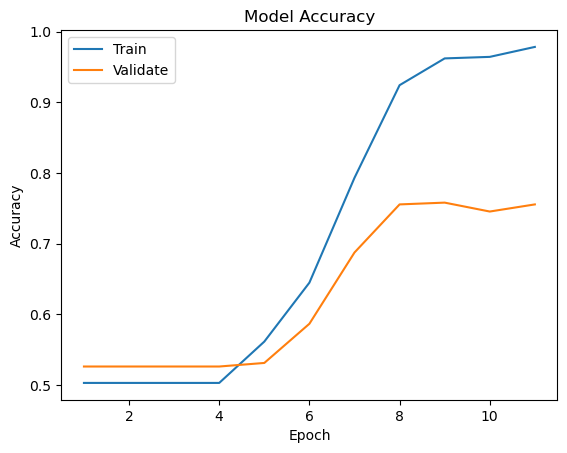

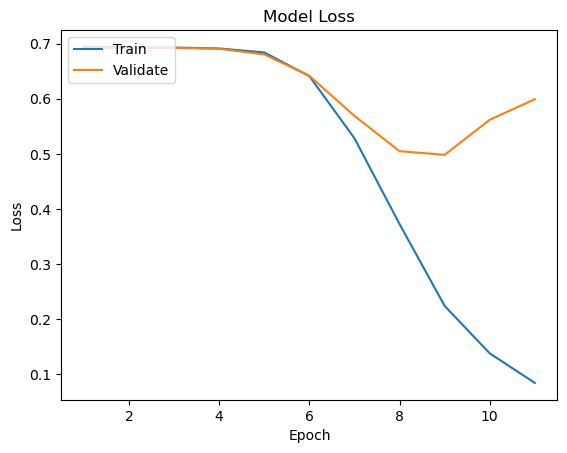

In [15]:
#creating function to plot model
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validate'], loc='upper left')
    plt.show()
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validate'], loc='upper left')
    plt.show()

#plotting model
plot_learningCurve(history, 11)

In [16]:
#evaluation model
score = model.evaluate(x_test, y_test)
score

13/13 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.7603


[0.5989734530448914, 0.7602905631065369]

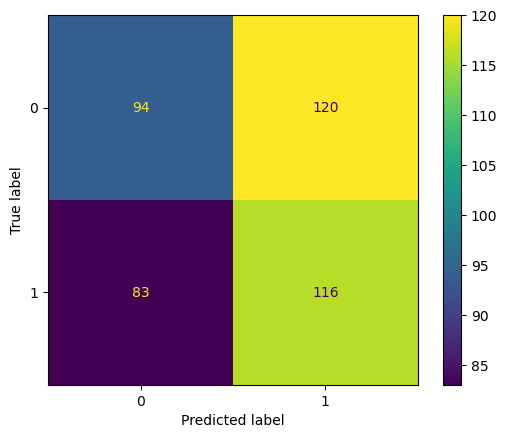

In [17]:
#creating confusion matrix
clf = SVC(random_state=0)
clf.fit(x_train, y_train)
SVC(random_state=0)
predictions = clf.predict(x_test)
confusion_matrix = confusion_matrix(y_test, predictions, labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=clf.classes_)
display.plot()
plt.show()

In [18]:
#saving the model
model.save('SentimentAnalysisModel.h5')

#### F. Functionality<a id='f'></a>

The analysis started with 3,000 reviews, and I reduced it to 2,065 before being processed through the model.  Based on the results, this sentiment analysis could be used to assess customer feedback continually and can be deployed quickly for different uses and products.  For this analysis, we considered reviews from Amazon, IMDB, and Yelp, but adding additional sources would be extremely easy.

#### G. Recommendations<a id='g'></a>

The sentiment analysis aimed to determine if customer reviews can be classified as positive or negative using a model that analyzes specific words used by reviewers.  Based on the results, the model has a high degree of accuracy.  The model can be improved to increase accuracy by using more input data and tweaking the hyperparameters and layers.  Companies can use this model to identify and classify negative reviews into different groups.  For example, are the negative reviews due to damaged products from Amazon or poor service due to understaffed restaurants on Yelp?  Companies can use negative feedback to improve the customer experience, which would help increase revenues.

### PART VI: REPORTING

#### H. Reporting<a id='fh'></a>

A Jupyter Notebook was submitted for the performance assessment.

#### I. Third-Party Code References<a id='i'></a>

Elleh, Dr. Festus (n.d.).  <i>Advanced Data Analytics - Task 2</i>.  [PowerPoint].
    </br>&emsp;&emsp;Western Governors University.

manjeet_04 (2023, July 11).  <i>Python | Remove punctuation from string</i>.  Geeks for Geeks.
    </br>&emsp;&emsp;Retrieved August 20, 2023, from https://www.geeksforgeeks.org/python-remove-punctuation-from-string/
    
Python (n.d.).  <i>csv — CSV File Reading and Writing</i>.  Python.
    </br>&emsp;&emsp;Retrieved August 20, 2023, from https://docs.python.org/3/library/csv.html
    
Saturn Cloud (2023, June 19).  <i>What is Lemmatization and How to Use it on All Pandas Cells</i>.  Saturn Cloud.
    </br>&emsp;&emsp;Retrieved August 21, 2023, from https://saturncloud.io/blog/what-is-lemmatization-and-how-to-use-it-on-all-pandas-cells/
    
Sewell, Dr. William (n.d.).  <i>D213 Advanced Data Analytics Sentiment Analysis I</i>.  [Video].
    </br>&emsp;&emsp;Western Governors University.  https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a1e9802c-5808-4287-a7e5-aed601580d89

#### J. Sources<a id='j'></a>

Elleh, Dr. Festus (n.d.).  <i>Advanced Data Analytics - Task 2</i>.  [PowerPoint].
    </br>&emsp;&emsp;Western Governors University.